In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [126]:
df = pd.read_csv("data.csv")

In [127]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [128]:
df = df.drop(['id', 'Unnamed: 32'], axis=1)

In [129]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [130]:
df.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [131]:
df.shape

(569, 31)

In [132]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df.iloc[:, 1:], df.iloc[: , 0], test_size=0.2)

In [133]:
X_train.shape, X_test.shape

((455, 30), (114, 30))

In [134]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [135]:
X_train

array([[ 0.77905579, -0.09188504,  0.73782972, ...,  0.50612677,
        -0.14065821, -0.66022525],
       [-0.84318773, -0.99090026, -0.84513232, ..., -0.70347498,
         0.48979937, -0.62712781],
       [-0.61709107, -0.05936252, -0.64680107, ..., -0.679392  ,
        -0.5829435 , -0.23108044],
       ...,
       [-0.22142192,  0.21707885, -0.18129631, ...,  0.32891239,
        -0.08436735,  2.29161788],
       [-0.68492007, -1.47641495, -0.69474478, ..., -0.44674132,
        -0.20177399,  0.19694242],
       [-0.5916552 ,  0.542304  , -0.60500398, ..., -0.62880259,
        -0.73894958,  0.0763331 ]], shape=(455, 30))

In [136]:
X_test

array([[ 0.49643496, -0.30328138,  0.50425779, ...,  1.01505011,
         1.43870235,  1.16406092],
       [-0.09424255, -0.72607407, -0.1415481 , ..., -0.66818357,
         0.68440489, -0.39488473],
       [ 1.62974446,  1.37627419,  1.60245564, ...,  0.89690719,
         0.65545531,  0.0336991 ],
       ...,
       [-1.3708408 , -1.2394652 , -1.3151446 , ..., -0.9559676 ,
         0.61846418,  0.04772344],
       [-0.45034479, -0.51003166, -0.52018049, ..., -1.29752181,
        -1.60261213, -1.38724705],
       [-0.40795166, -0.18480651, -0.46977813, ..., -1.59360614,
        -0.6311928 , -1.10732122]], shape=(114, 30))

In [137]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)

In [138]:
model.fit(X_train, Y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [139]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)

In [140]:
y_pred

array(['M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B',
       'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'M', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'B'], dtype=object)

In [141]:
acc = accuracy_score(Y_test, y_pred)
acc

0.9736842105263158

In [142]:
scores =[]
for i in range(1,16):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(Y_test, y_pred)
    scores.append(acc)
    
    

In [143]:
scores

[0.9385964912280702,
 0.9473684210526315,
 0.9649122807017544,
 0.9649122807017544,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9649122807017544,
 0.9649122807017544,
 0.956140350877193,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315]

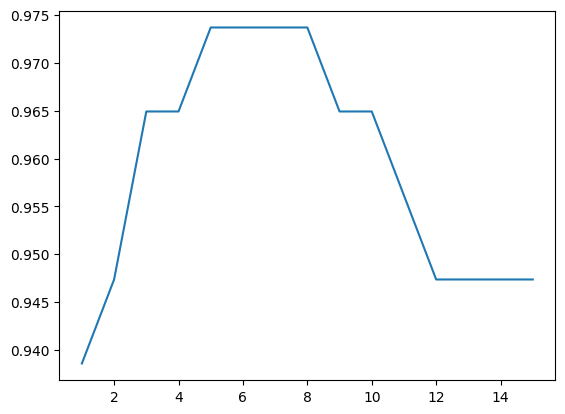

In [147]:
plt.plot(range(1, 16), scores )

In [148]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

acc = accuracy_score(Y_test, y_pred)
acc

0.9473684210526315

In [149]:
print(confusion_matrix(Y_test, y_pred))

[[67  0]
 [ 6 41]]


In [150]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           B       0.92      1.00      0.96        67
           M       1.00      0.87      0.93        47

    accuracy                           0.95       114
   macro avg       0.96      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

